# Parent Tree Visualization

The goal of this notebook is to test out how to visualize smarty/smirky parent dictionaries
It will include how to rebuild those dictionaries from loaded trajectory data and how
to visualize them. Following the example for [Node-backgrounds here](http://etetoolkit.org/docs/2.3/tutorial/tutorial_drawing.html#node-backgrounds)

Authors
* Caitlin C. Bannan

In [186]:
from smarty import *
from ete2 import Tree, faces, AttrFace, TreeStyle, NodeStyle, TextFace, add_face_to_node, random_color
from smarty import *

In [86]:
# Copied from http://etetoolkit.org/docs/2.3/tutorial/tutorial_drawing.html#node-backgrounds
def layout(node):
    if node.is_leaf():
        N = AttrFace("name", fsize=30)
        faces.add_face_to_node(N, node, 0, position="aligned")

def get_example_tree():

    # Set dashed blue lines in all leaves
    nst1 = NodeStyle()
    nst1["bgcolor"] = "LightSteelBlue"
    nst2 = NodeStyle()
    nst2["bgcolor"] = "Moccasin"
    nst3 = NodeStyle()
    nst3["bgcolor"] = "DarkSeaGreen"
    nst4 = NodeStyle()
    nst4["bgcolor"] = "Khaki"


    t = Tree("((((a1,a2),a3), ((b1,b2),(b3,b4))), ((c1,c2),c3));")
    for n in t.traverse():
        n.dist = 2
    
    n1 = t.get_common_ancestor("a1", "a2", "a3")
    n1.set_style(nst1)
    n2 = t.get_common_ancestor("b1", "b2", "b3", "b4")
    n2.set_style(nst2)
    n3 = t.get_common_ancestor("c1", "c2", "c3")
    n3.set_style(nst3)
    n4 = t.get_common_ancestor("b3", "b4")
    n4.set_style(nst4)
    ts = TreeStyle()
    ts.layout_fn = layout
    ts.show_leaf_name = False

    ts.mode = "c"
    ts.root_opening_factor = 1
    return t, ts

# https://github.com/etetoolkit/ete/issues/219
def my_layout(node):
    F = TextFace(node.name, tight_text=True)
    add_face_to_node(F, node, column=0, position="branch-right")

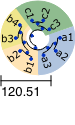

In [88]:
t, ts = get_example_tree()
ts.layout_fn = my_layout
#t.show(tree_style=ts)
t.render("%%inline", tree_style=ts)  


-- /-CT

   /- /- /- /-H3
--|
   \-HO

   /-OH
--|
   \-OS

--Cl


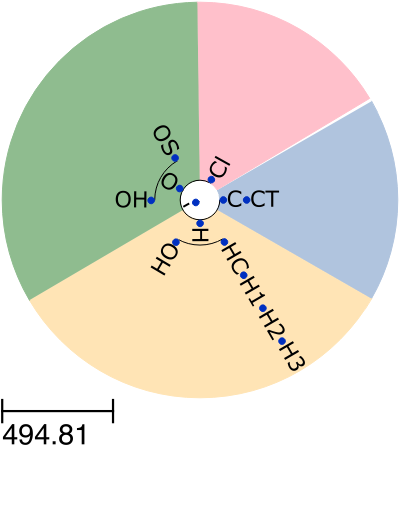

In [168]:
parent_child = """
- C
- H
- O
- Cl
C CT
H HC
H HO
HC H1
H1 H2
H2 H3
O OH
O OS
"""
def get_node(nodename):
    if nodename in nodes_by_name:
        return nodes_by_name[nodename]
    else:
        nodes_by_name[nodename] = Tree(name=nodename)
        return nodes_by_name[nodename]

nodes_by_name = {}
for line in parent_child.split('\n'):
    if not line: continue
    parent_name, child_name = line.split()
    parent = get_node(parent_name.strip())
    parent.add_child(get_node(child_name.strip()))


colorList = ["LightSteelBlue", "Moccasin", "DarkSeaGreen", "Pink"]
# use any random node to get the tree root
root = parent.get_tree_root()

# make elemental roots each a different color:
for idx, n in enumerate(root.get_children()):
    nst = NodeStyle()
    nst["bgcolor"] = colorList[idx]
    n.set_style(nst)
    print n

# Render tree
ts = TreeStyle()
ts.layout_fn = my_layout
ts.show_leaf_name = False

ts.mode = "c"
ts.root_opening_factor = 1

root.render("%%inline",tree_style=ts, w=400)

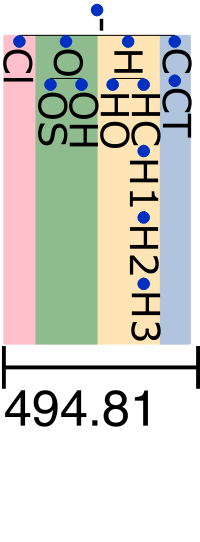

In [170]:
ts.mode = "r"
ts.rotation = 90
root.render("%%inline", tree_style=ts, w=200)

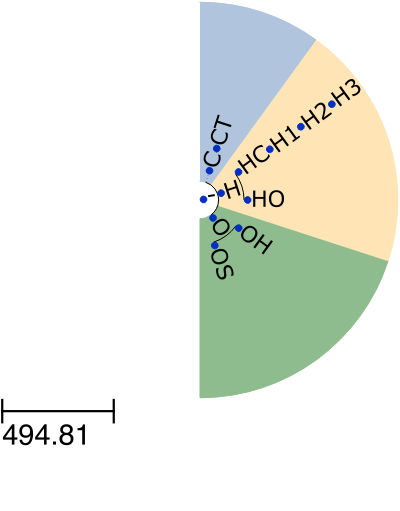

In [131]:
ts.mode = "c"
ts.rotation = 0
ts.arc_start = 288 # 0 degrees = 3 o'clock
ts.arc_span = 180
root.render("%%inline", tree_style=ts, w=400)

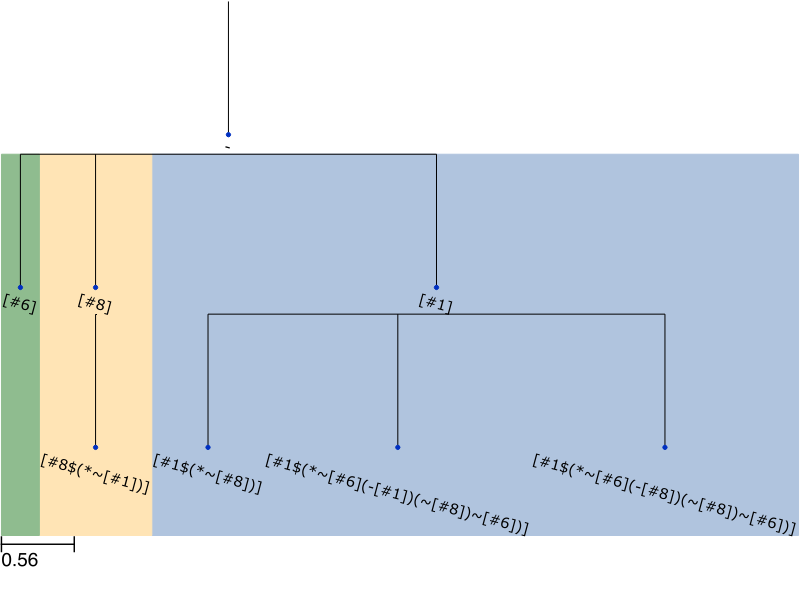

In [200]:
# https://github.com/etetoolkit/ete/issues/219
def my_layout(node):
    F = TextFace(node.name, tight_text=True)
    F.rotation = -75
    add_face_to_node(F, node, column=0, position="branch-right")

def get_node(nodename, nodes_by_name):
    if nodename in nodes_by_name:
        return nodes_by_name[nodename]
    else:
        nodes_by_name[nodename] = Tree(name=nodename)
        return nodes_by_name[nodename]

def traj_to_tree(trajFile):
    data = pd.read_csv(trajFile, quotechar="'")
    data_dict = data.to_dict()

    traj = score_utils.load_trajectory(trajFile)
    iterations = [k for k in traj.keys()]
    max_it = iterations[-1]
    traj[max_it]

    nodes_by_name = {}
    for k, entry in traj[max_it].items():
        if k == 'all':
            continue
        parent = entry['parentsmarts']
        if parent == 'None':
            parent = '-'
        kid = entry['smarts']
        parent = get_node(parent, nodes_by_name)
        parent.add_child(get_node(kid, nodes_by_name))
    
    # use any random node to get the tree root
    return parent.get_tree_root()

def visualize_hierarchy(trajFile, shape = "c"): # other options?
    # Set Tree File
    ts = TreeStyle()
    ts.layout_fn = my_layout
    ts.show_leaf_name = False
    ts.mode = shape
    ts.root_opening_factor = 1

    colorList = ["LightSteelBlue", "Moccasin", "DarkSeaGreen", "Pink"]
    tree = traj_to_tree(trajFile)

    # make elemental roots each a different color:
    for idx, n in enumerate(tree.get_children()):
        nst = NodeStyle()
        nst["bgcolor"] = colorList[idx]
        n.set_style(nst)
    
    return tree, ts

t, ts = visualize_hierarchy("/Users/cbanana/github/SMIRFF/smarty/examples/smarty_simulations/AlkEthOH.csv", "r")
ts.rotation = 90
t.render("%%inline", tree_style=ts, w=800)
#help(TextFace)